In [1]:
import numpy as np
import matplotlib.pyplot as plt  # Тоже принятое сообществом сокращение
%matplotlib inline

# Типы графиков в matplotlib
## plt.plot
Чаще всего достаточно функции `plt.plot()`. Она принимает на вход любой `iterable` и последовательно строит значения. Построим, например, график синуса:

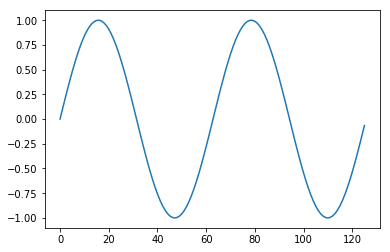

In [2]:
x = np.arange(0, 4*np.pi, 0.1)
plt.plot(np.sin(x))
plt.show()

Однако, если присмотреться к осям то можно заметить одну неприятную вещь. Посмотрите, какой период у получившегося синуса? Около 63 (оно и логично,  $2\pi * \frac{1}{0.1}$).
Чтобы такого не происходило, можно передать в `plt.plot()` ещё и `iterable`, содержащий аргументы. 
**Обратите внимание, что сначала передают значения аргументов, а затем значения функции.**

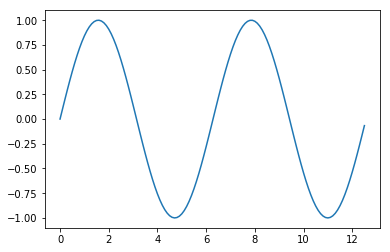

In [3]:
x = np.arange(0, 4*np.pi, 0.1)
plt.plot(x, np.sin(x))

## plt.scatter
Другой распространённый тип графиков - это `plt.scatter()`. Переводится как **"диаграмма рассеяния"** или что-то вроде того.
В отличии от `plt.plot()`, `plt.scatter()` для построения уже **всегда требует минимум два параметра**: это аргументы и соответствующие им значения функции.

`plt.scatter(X, Y)` выводит пары точек $(x_i, y_i): x \in X, y \in Y$. Рассмотрим применение scatterplot на примере параметрически заданной функции:

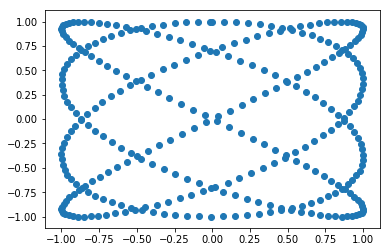

In [4]:
t = np.arange(0, 2*np.pi, 0.02)
x = np.sin(4*t)
y = np.cos(3*t)

plt.scatter(x, y)

Да, то же самое можно сделать и с помощью `plt.plot()`

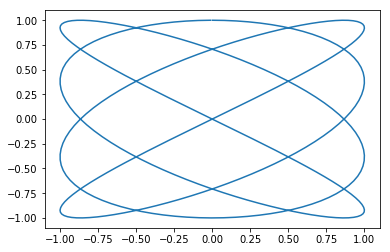

In [5]:
t = np.arange(0, 2*np.pi, 0.02)
x = np.sin(4*t)
y = np.cos(3*t)

plt.plot(x, y)

Однако `plt.scatter` даёт чуть больше возможностей. Например, при помощи colormap можно посмотреть как менялись $x$ и $y$ во времени $t$. 

А так же можно увидеть и скорость изменения - по углам точки располагаются гораздо плотнее, что говорит о уменьшении скорости.

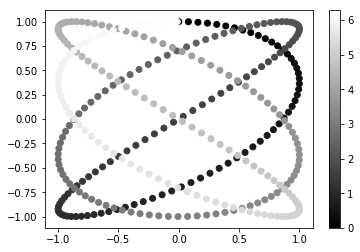

In [6]:
t = np.arange(0, 2*np.pi, 0.02)
x = np.sin(4*t)
y = np.cos(3*t)

# Обратим внимания нановые параметры:
# c (color) - ожидает на вход iterable соразмерный с x и y, в который передаются значения цветов точек или любая численная последовательность для использования с cmap
# cmap (colormap) - непрерывный набор цветов (палитра) для раскрашивания точек. Каталог палитр можно посмотреть здесь: https://matplotlib.org/users/colormaps.html
plt.scatter(x, y, c=t, cmap='gray')  
plt.colorbar()

## plt.hist
Ещё один распространённый вид графиков это гистограммы. В пакете matplotlib строятся функцией `plt.hist()` которая принимает на вход `iterable` из которого затем построит частотную гистограмму.

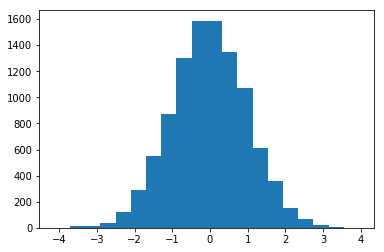

In [7]:
x = np.random.normal(loc=0, scale=1, size=10000)
count, threshold, bars = plt.hist(x, bins=20)

Помимо данных для графического представления гистограммы (bars), `plt.hist()` возвращает ещё данные частотного анализа: `threshold` содержит границы, а `count` содержит частоты распределения соответственно границе: $ count_i = \sum[threshold_i <= x < threshold_{i+1}] $

In [8]:
for i in range(5):
    print(f'В интервал [{threshold[i]:2.4}; {threshold[i+1]:2.4}) попало {int(count[i])} значений выборки')

В интервал [-4.12; -3.717) попало 2 значений выборки
В интервал [-3.717; -3.313) попало 10 значений выборки
В интервал [-3.313; -2.909) попало 11 значений выборки
В интервал [-2.909; -2.505) попало 35 значений выборки
В интервал [-2.505; -2.101) попало 120 значений выборки


## Подписи на графиках
Наверняка каждый из нас получал неуд за лабу просто за то, что не подписал оси на графиках. Избежать боли с matplotlib очень просто: оси подписываются отдельно функциями `plt.xlabel()`/`plt.ylabel()` соответственно:

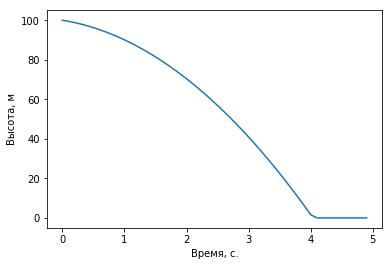

In [9]:
# Дано
g = 9.8
h0 = 100
v0 = 5

t = np.arange(0, 5, 0.1)

# См. учебник физики, раздел равноускоренное движение
h = h0 - v0 * t - g*t**2 / 2
h[h < 0] = 0

plt.plot(t, h)

plt.xlabel('Время, с.')
_ = plt.ylabel('Высота, м')

Так же, можно подписать график целиком используя функци `plt.title()`

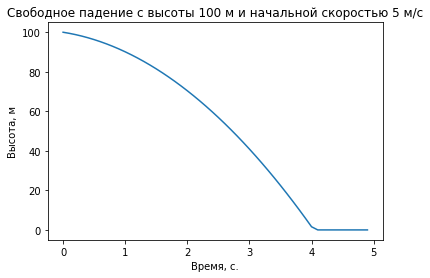

In [10]:
# Дано
g = 9.8
h0 = 100
v0 = 5

t = np.arange(0, 5, 0.1)

# См. учебник физики, раздел равноускоренное движение
h = h0 - v0 * t - g*t**2 / 2
h[h < 0] = 0

plt.plot(t, h)

plt.xlabel('Время, с.')
plt.ylabel('Высота, м')
_ = plt.title(f'Свободное падение с высоты {h0} м и начальной скоростью {v0} м/с')